In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree

In [3]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [12]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.257331,-1.076137,0.134819,-0.646710,-1.398784,1
1,0.028243,-0.741679,-0.775810,2.840241,-0.885478,1
2,1.753994,-0.811284,-2.365713,0.223467,-3.144869,1
3,-0.532354,-1.087231,0.578743,-2.670692,-0.425150,0
4,-1.692430,-0.677770,1.625134,-1.633878,-0.988466,0


In [13]:
bag = BaggingClassifier(max_features=2)

In [14]:
bag.fit(df.iloc[:, :5], df.iloc[:, -1])

BaggingClassifier(max_features=2)

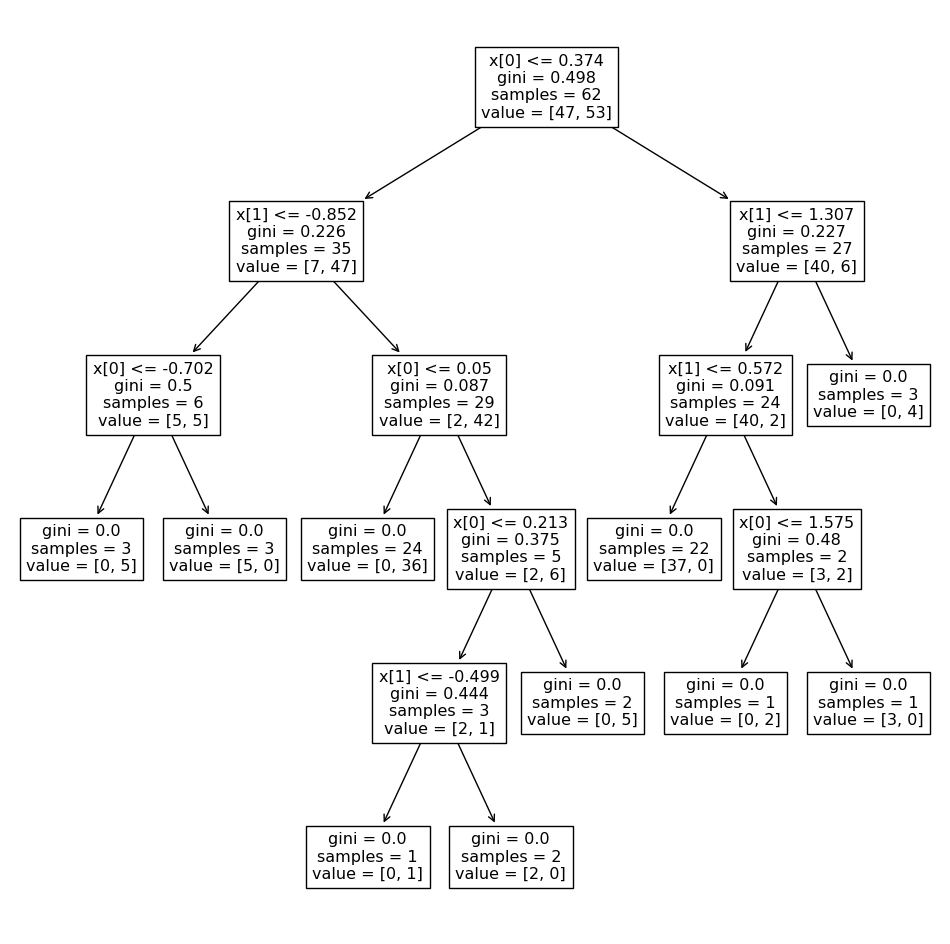

In [15]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

<!-- here all node split on o or 1 , 
this is proves columns sampling is tree level
means before creating tree it's decided shere split it -->

In [16]:
# here node split on 0 or 1 
# that proves in bagging column sampling is tree level 
# means before create the tree it's finilize

In [17]:
rf = RandomForestClassifier(max_features=2)

In [18]:
rf.fit(df.iloc[:, :5], df.iloc[:, -1])

RandomForestClassifier(max_features=2)

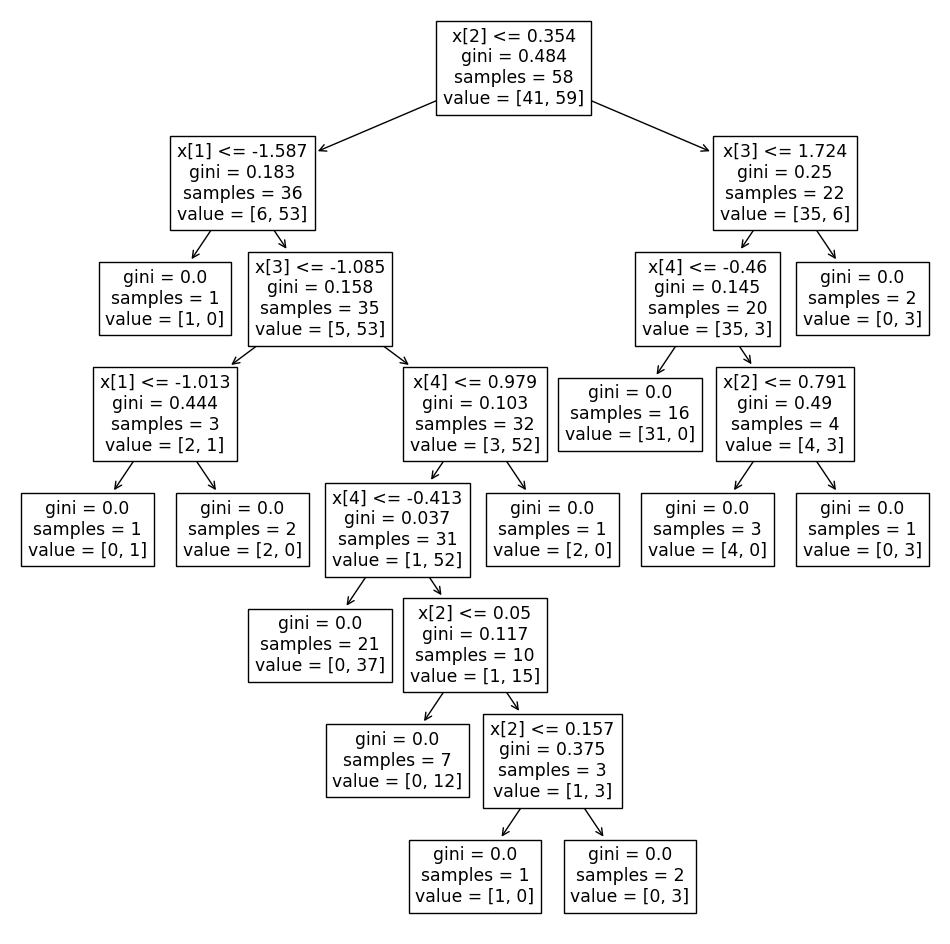

In [24]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[0])
plt.show()

In [25]:
# here the node selects randomly
# that proves in random forest column sampling is node level 
#  and create more randomness
# that why the random forest gives better result as compared to bagging